# Data Analysis with pandas

### 1. Install all libraries needed
* import sys   
* pip install matplotlib
* pip install seaborn
* pip install plotly
* pip install wordcloud
* pip install pandas
* pip install skimpy

In [1]:


import matplotlib.pyplot as plt # Data Visualization
import pandas as pd # To read data and create dataframes
import plotly_express as px # Data Visualization
import seaborn as sns # Data Visualization
from skimpy import clean_columns # Data set cleaning
from wordcloud import WordCloud # 




### 2. Get and Inspect the data

In [2]:
#Display float with 2 decimal values

pd.options.display.float_format ='{:.2f}'.format

In [3]:
raw = pd.read_csv("https://raw.githubusercontent.com/Sven-Bo/datasets/master/YouTube_Data.csv") # Open de URL in csv format

In [4]:
# sample data
raw.sample(5) # retrieve  5 row of raw data

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
17,v49tYBmnnFg,How To Send SMS Messages From Excel With VBA |...,21-Nov-20,53,27.42,362,35044,259872,8.71
52,sh8pErS21rE,How to Split Each Excel Sheet Into a Separate ...,8-Jan-22,21,26.69,102,2866,51253,2.85
43,_aPa9gZ1s0M,How to Run Python in an Open Excel Workbook (E...,11-Feb-21,24,20.83,393,22070,178362,7.73
35,_H5hsUwv8lE,Make a GUI with just ONE LINE of code using Py...,10-Apr-22,30,21.32,311,7158,101762,4.70
53,w6-28jcr09Q,Python: How to Loop Through Folders and Subfol...,13-Nov-21,21,41.33,308,9416,100508,5.63


In [5]:
#get an overviw of the data

raw.info() # retrieve the informationof each columns ( Data types, Null values, etc )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             107 non-null    object 
 1   Video title                         107 non-null    object 
 2   Video publish time                  102 non-null    object 
 3   Comments added                      107 non-null    int64  
 4   Average percentage viewed (%)       107 non-null    float64
 5   Likes                               107 non-null    int64  
 6   Views                               107 non-null    int64  
 7   Impressions                         107 non-null    int64  
 8   Impressions click-through rate (%)  106 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.7+ KB


In [6]:
# check for missing values abs

raw.isna().sum() # in pandas the function .isna() works to detect missing values

Content                               0
Video title                           0
Video publish time                    5
Comments added                        0
Average percentage viewed (%)         0
Likes                                 0
Views                                 0
Impressions                           0
Impressions click-through rate (%)    1
dtype: int64

In [7]:
# chek for missing values in %

raw.isna().mean().mul(100)

Content                              0.00
Video title                          0.00
Video publish time                   4.67
Comments added                       0.00
Average percentage viewed (%)        0.00
Likes                                0.00
Views                                0.00
Impressions                          0.00
Impressions click-through rate (%)   0.93
dtype: float64

In [8]:
#display row with missing values
raw[raw.isnull().any(axis="columns")] # The .isnull() method in pandas is used to detect missing or NaN (Not a Number) values in a DataFrame. It returns a boolean DataFrame of the same shape as the original DataFrame

#The .any(axis='columns') method in pandas is used to check if any value in each row of a DataFrame evaluates to True along the specified axis. It returns a Series of boolean values indicating whether any element in each row along the specified axis is True.

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
94,8E4se9Ah5o8,MyToolBelt Installation,NaN,5,72.18,22,1309,13,0.00
96,V3Csrk--laM,Create Invoice Filepath,NaN,5,70.11,1,16,5,0.00
100,RnTqlKzQhRY,PySimpleGUI Retrieve Data,NaN,4,85.97,6,182,78,2.56
105,l4Dd1xLfNVY,xlwings - demo,NaN,0,102.23,0,3,0,NaN
106,pqIjey6Cbhw,"How to resolve ""pytube.exceptions.RegexMatchEr...",NaN,0,44.91,0,13,3,0.00


In [9]:
# generate a descriptive statistics
raw.describe().T #.t function is the traspose function


,count,mean,std,min,25%,50%,75%,max
Comments added,107.00,37.24,89.53,0.00,8.50,21.00,33.50,885.00
Average percentage viewed (%),107.00,33.75,16.57,12.62,23.55,28.91,38.79,102.23
Likes,107.00,417.86,1081.01,0.00,92.50,203.00,352.50,10175.00
Views,107.00,17792.68,50709.27,3.00,2582.00,6382.00,12968.50,442044.00
Impressions,107.00,249785.20,1133091.96,0.00,43961.00,79838.00,132846.50,11550064.00
Impressions click-through rate (%),106.00,4.46,2.06,0.00,3.06,4.17,5.73,10.86


In [10]:
#inspect highest average percentage viewed
raw.nlargest(5, columns =["Average percentage viewed (%)"])

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
105,l4Dd1xLfNVY,xlwings - demo,NaN,0,102.23,0,3,0,NaN
100,RnTqlKzQhRY,PySimpleGUI Retrieve Data,NaN,4,85.97,6,182,78,2.56
89,HYl-gftg9Rw,How To Save Cookies & Login Data In Selenium V...,21-Sep-21,6,81.96,46,2436,325,3.38
75,0_HlInz6HuM,"How To Remove “Made with Streamlit”, Hamburger...",22-Jul-21,10,78.33,115,3708,31197,3.57
99,JaPj_gOTg6M,Pull Stock Data & Export It To Excel Using Pyt...,6-Mar-21,4,73.26,89,1961,37686,2.76


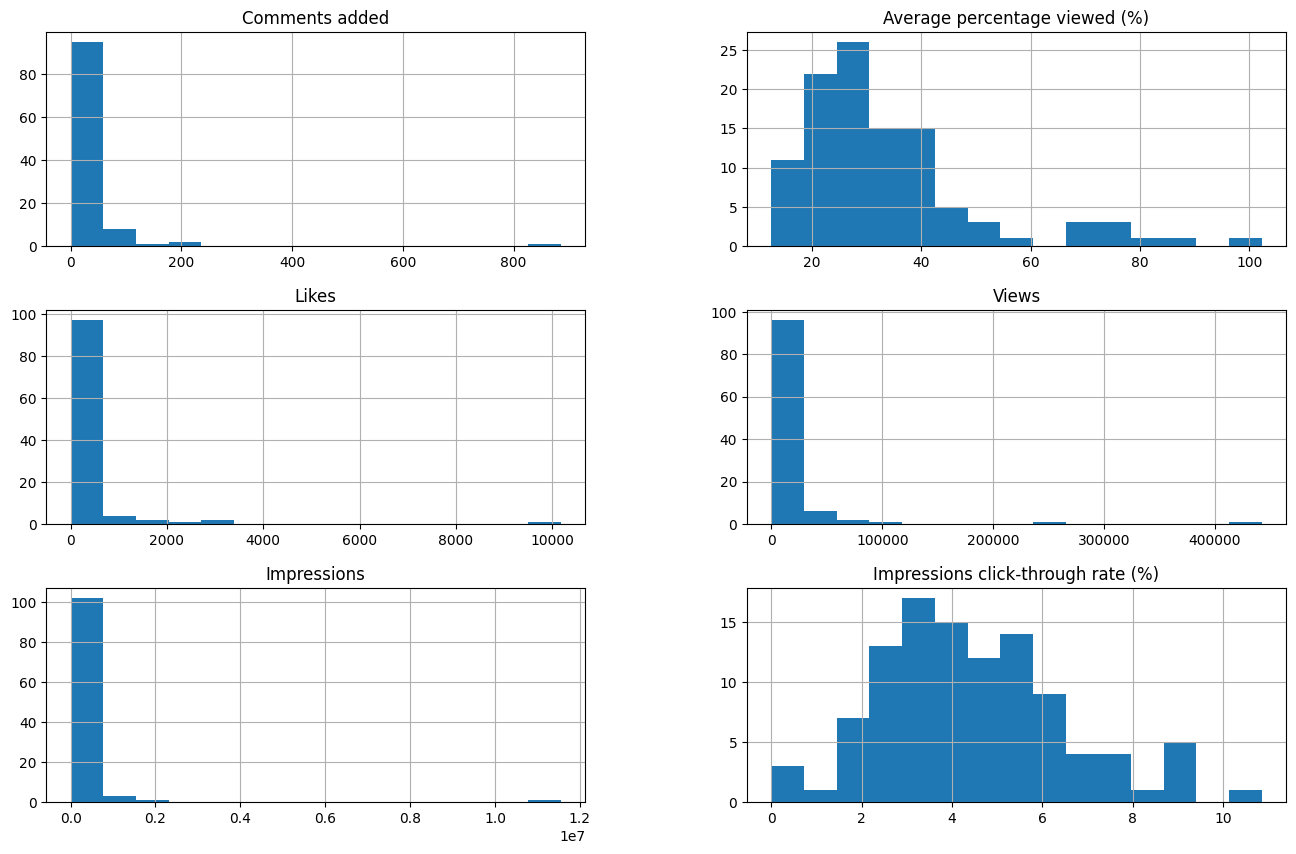

In [11]:
# Data Explorations
# Most feature (columns) are showing a difference between mean <> median
# this indicates that the data is skewed
hist = raw.hist(bins=15, figsize=(16,10))

# axis x: data values.
# axis y: The frequency or density of occurrence of those values in the data set.

In [12]:
#check correlation of the features (columns)
raw.corr(numeric_only=True).style.background_gradient(cmap ='RdBu', vmin=-1, vmax=1)
# see how the columns correlate, the number closer to 1 indicate a stronger positive correlation on the flip side a number closer to -1 indicate a negative correlation

,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
Comments added,1.000000,-0.141652,0.484353,0.672014,0.362981,0.224351
Average percentage viewed (%),-0.141652,1.000000,-0.202818,-0.189377,-0.163310,-0.241190
Likes,0.484353,-0.202818,1.000000,0.958418,0.958740,0.079380
Views,0.672014,-0.189377,0.958418,1.000000,0.923668,0.134627
Impressions,0.362981,-0.163310,0.958740,0.923668,1.000000,-0.015123
Impressions click-through rate (%),0.224351,-0.241190,0.079380,0.134627,-0.015123,1.000000


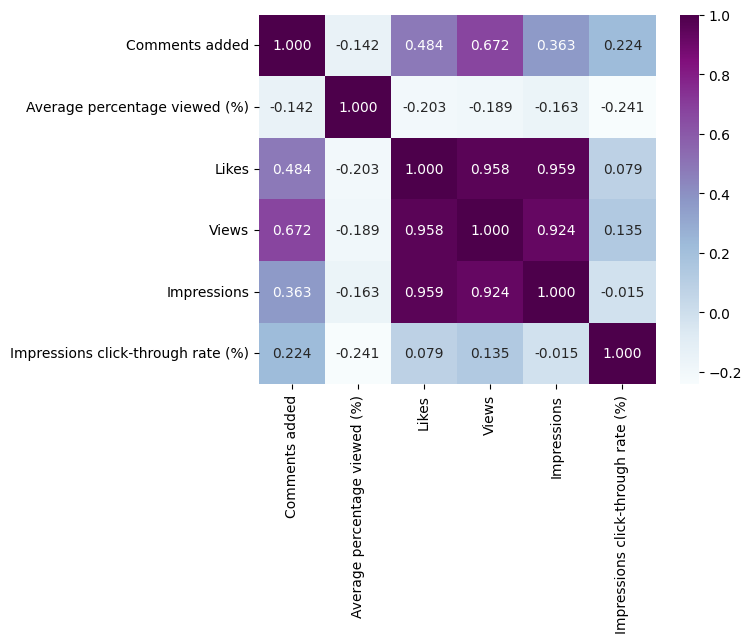

In [13]:
#plot heatmap
heatmap =sns.heatmap(raw.corr(numeric_only=True), cmap="BuPu", annot=True, fmt= ".3f")

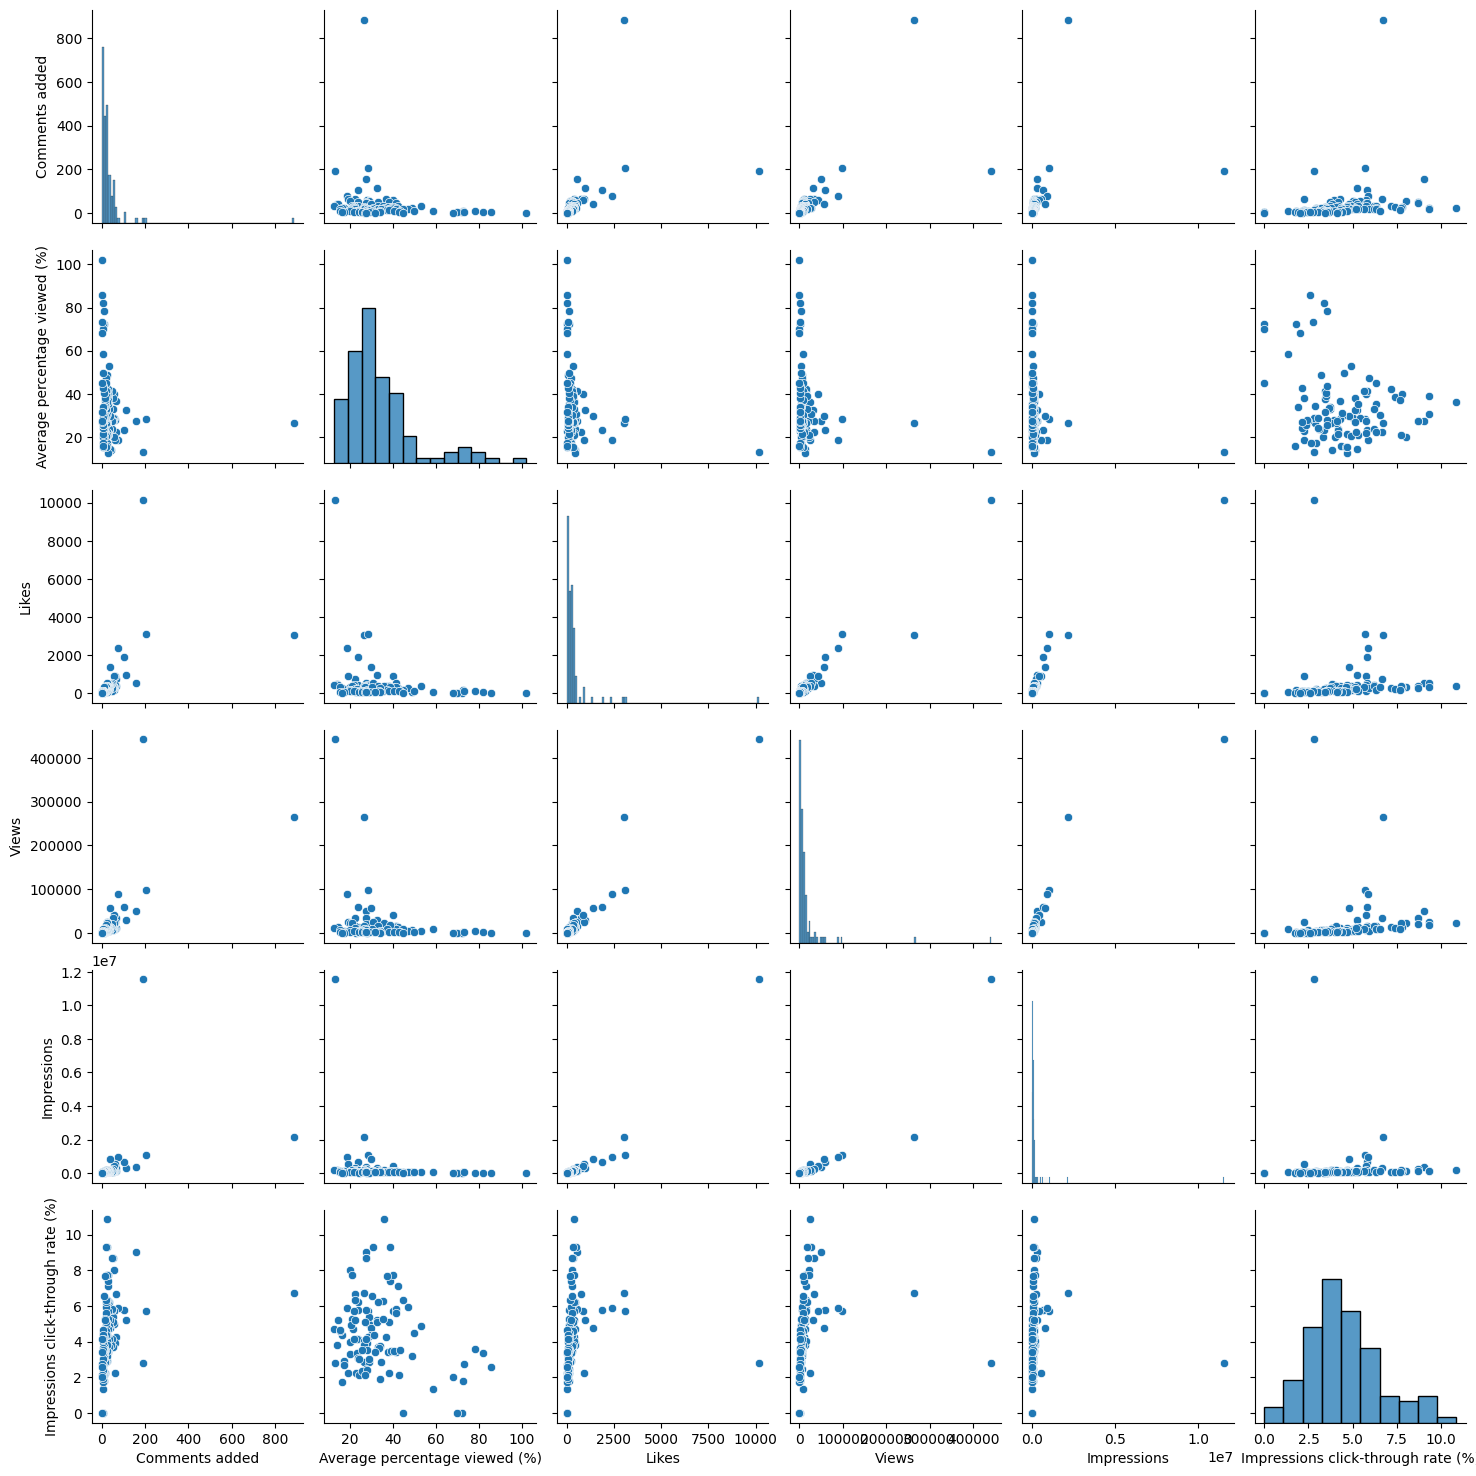

In [14]:
#plot pairwise relationship
sns.pairplot(raw) # digging deeper into the correlation using the seaborn pair plot computing the chart to get a pairwise relationship for each columns, it can be hard to read if we have outliers in the data

In [15]:
#show outliers
raw["Views"].nlargest(8) # chek the videos with the most views, two video perfomr better than the rest

2     442044
0     265002
1      99259
6      88223
5      59870
23     56273
3      50270
11     42471
Name: Views, dtype: int64

In [16]:
#set upper limit for outliers
q_hi = raw["Views"].quantile(0.99) # to exclude those, I set an upper limit by computing the 99th quantile of the views

q_hi

255057.41999999963

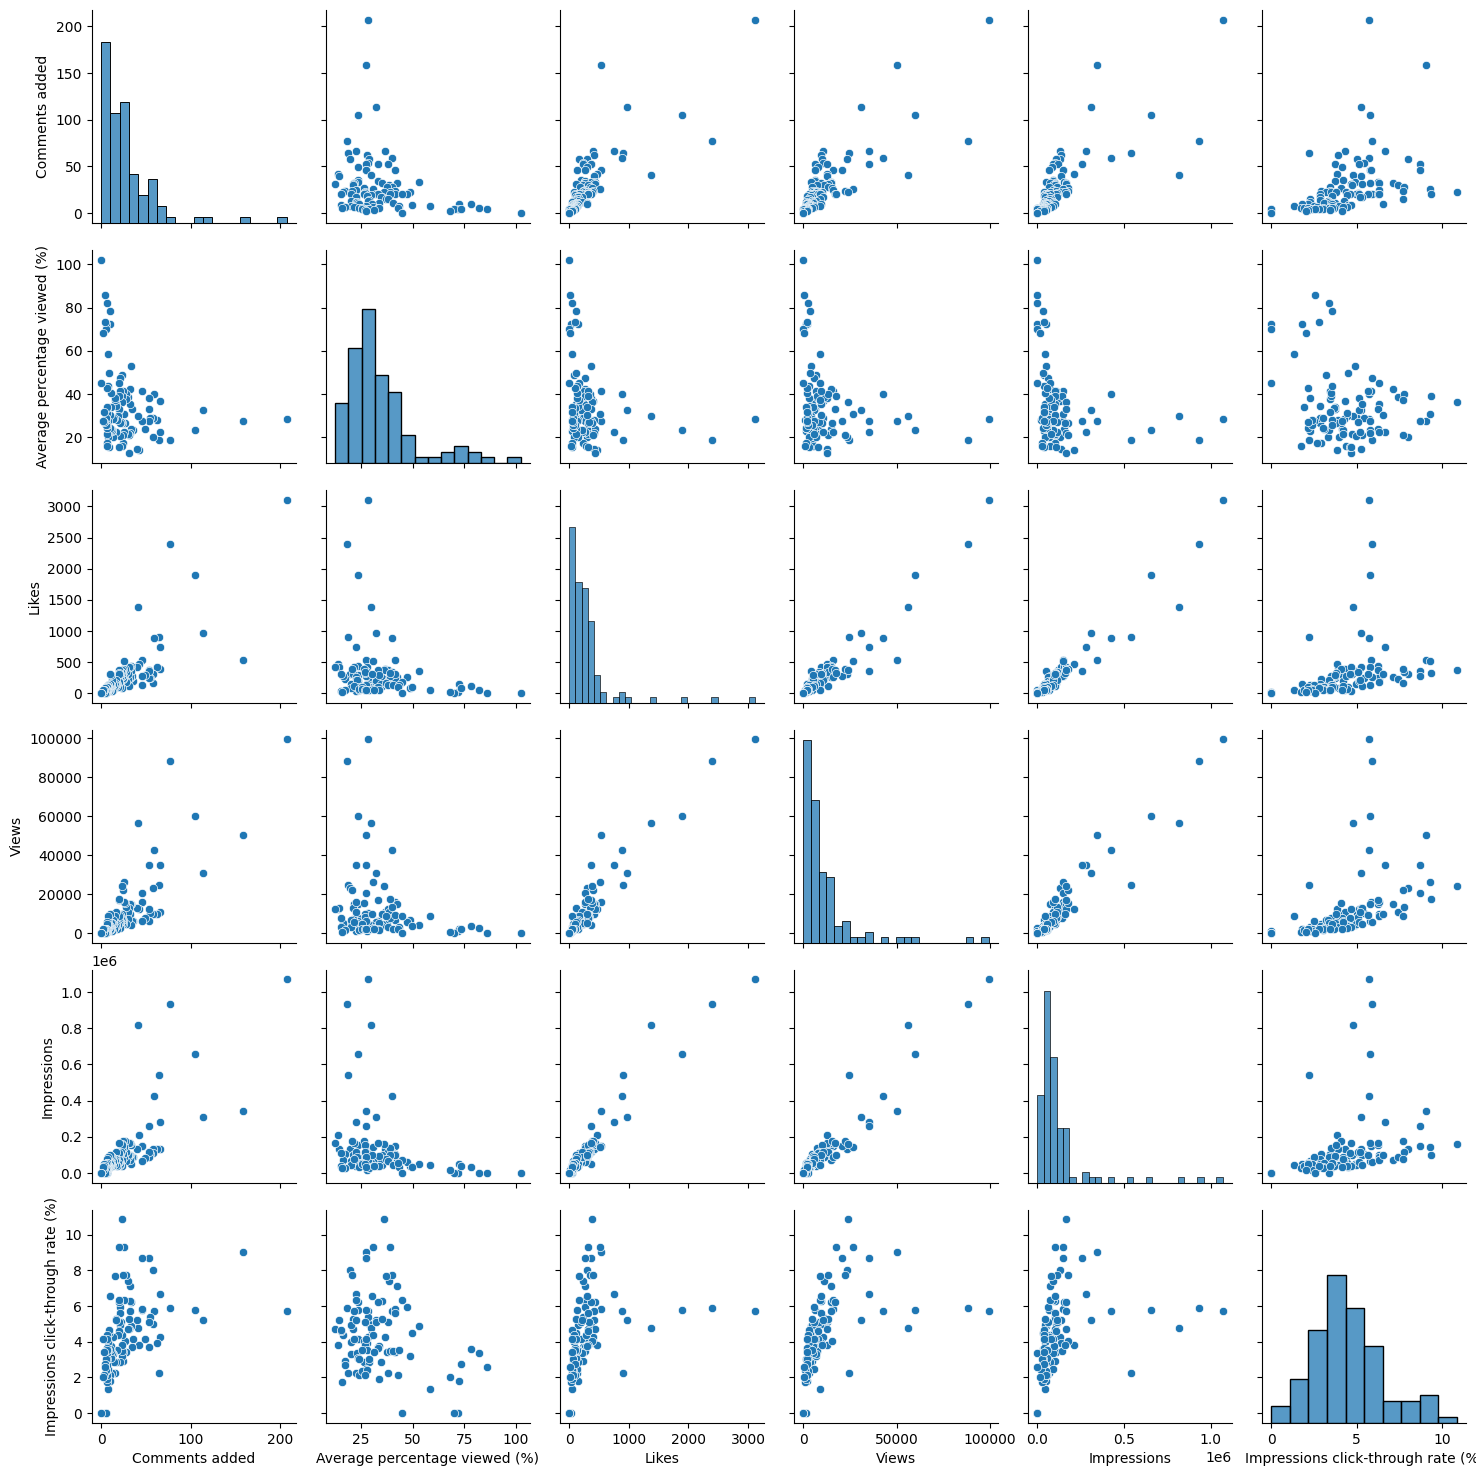

In [17]:
#plot pairwise relationship w/o outliers
sns.pairplot(raw.query("Views < @q_hi")) # we can use the q_hi output to filter the dataset before creating the pair plot
# now is easier to see the data points and analyse the relationships better

### 3. Clean up the data Frame

##### 3.1 example of Pandas Method chaining

In [18]:
# You can chain pandas method like so:
raw.query("Views > 1000").filter(regex="^V", axis="columns").rename(columns={"Video title": "Video_title"})
# use the .query function over the dataframe to look for views more than 1000, the using the .filter function to looks over certains columns using regular expresion that each column name start with "V", and reneme the column name "Video title" using the function .rename

,Video_title,Video publish time,Views
0,How To Send WhatsApp Messages From Excel Using...,19-Dec-20,265002
1,How to Create an Excel Data Entry Form in 10 M...,22-May-21,99259
2,Turn An Excel Sheet Into An Interactive Dashbo...,11-Sep-21,442044
3,Send BULK SMS From Your OWN Number Using EXCEL...,10-Jul-21,50270
4,Deploy Your Streamlit Web App on Heroku For Fr...,20-Mar-21,30941
...,...,...,...
98,How To Create An Interactive Population Pyrami...,24-Dec-20,2121
99,Pull Stock Data & Export It To Excel Using Pyt...,6-Mar-21,1961
101,Add a snowflake animation to your streamlit we...,24-Dec-21,2087
102,How To Create A GUI Program In Python Using Tk...,13-Sep-20,1994


In [19]:
# You can also break it down into multiple lines
# By doing so, it makes it easier to debug, as you can comment out line by line
(raw
 .query("Views > 1000")
 .filter(regex="^V", axis="columns")
 .rename(columns={"Video title": "Video_title"}) )

,Video_title,Video publish time,Views
0,How To Send WhatsApp Messages From Excel Using...,19-Dec-20,265002
1,How to Create an Excel Data Entry Form in 10 M...,22-May-21,99259
2,Turn An Excel Sheet Into An Interactive Dashbo...,11-Sep-21,442044
3,Send BULK SMS From Your OWN Number Using EXCEL...,10-Jul-21,50270
4,Deploy Your Streamlit Web App on Heroku For Fr...,20-Mar-21,30941
...,...,...,...
98,How To Create An Interactive Population Pyrami...,24-Dec-20,2121
99,Pull Stock Data & Export It To Excel Using Pyt...,6-Mar-21,1961
101,Add a snowflake animation to your streamlit we...,24-Dec-21,2087
102,How To Create A GUI Program In Python Using Tk...,13-Sep-20,1994


##### 3.2 using pandas method chaining to clean the dataframe

In [20]:
def clean_df(df, views_threshold=500):  # Create a function to clean the dataframe, with two argument the first is the DataFrame, and the second is viws_threshold set to 500

    remove_cols = ["Impressions", "Content"] # create a list of columns to remove

    remove_nan_values = ["Video publish time", "Impressions click-through rate (%)"] # Create a list of the columns tha contains the NaN values previously identified

    return (df
        .drop(labels=remove_cols, axis="columns") # Using the .drop method to remove the columns 

        .dropna(subset=remove_nan_values) # using the .dropna function to remove the NaN Values

        .pipe(clean_columns) # v The .pipe() method takes a function as an argument, applies that function to the DataFrame, and returns the result, clean_columns methods clean the columns name removes whitespace and replace special charactes

        .rename(
            columns={
                "impressions_click_through_rate_%": "impressions_ctr_pct",
                "average_percentage_viewed_%": "average_viewed_pct"
            }
        ) # reneme the columns  name using the function .rename

        .query("views > @views_threshold") # take the second argument and query the data with the conditions 
        
        .assign(video_publish_time=lambda df_: pd.to_datetime(df_.video_publish_time),
                days_since_published=lambda df_: (pd.to_datetime("today") - df_.video_publish_time).dt.days.astype(int),
                likes_per_day=lambda df_: (df_.likes / df_.days_since_published).round(2),
                likes_to_view_ratio_pct=lambda df_: ((df_.likes / df_.views) * 100).round(2),
                comments_to_view_ratio_pct=lambda df_: ((df_.comments_added / df_.views) * 100).round(2),
               )
    ) # The .assing method is used to create a new column o modify the existing one, select the columns that you want to change or create, the first column take video_publish_time columns and  use  the lambda function to create a function that receives as argument the dataframe and using the pandas functions .to_datetime to change the datatypes as Date object, the second columns create a new column days_since_published use the .to_datetime functions with "today" parameters as result get todays date and rest today date with the date since was published and takes de object datetime and takes the days and use .astype to covert it in a integers, the third column create a new columns taking the likes columns and dividing them with the days_since_published and round it with two decimal, the fourth column likes_to_view_ratio_pct and using the lamnda function takes the likes columns and dividing them with the viws columns, the fifth column comments_to_view_ratio_pct using the lamnda function create a ratio taking ccomments_added column and dividing with the viws columns
df = clean_df(raw)
df.head(3)

C:\Users\HOME\AppData\Local\Temp\ipykernel_14988\2828360663.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  .assign(video_publish_time=lambda df_: pd.to_datetime(df_.video_publish_time),


,video_title,video_publish_time,comments_added,average_viewed_pct,likes,views,impressions_ctr_pct,days_since_published,likes_per_day,likes_to_view_ratio_pct,comments_to_view_ratio_pct
0,How To Send WhatsApp Messages From Excel Using...,2020-12-19,885,26.36,3057,265002,6.71,1171,2.61,1.15,0.33
1,How to Create an Excel Data Entry Form in 10 M...,2021-05-22,207,28.48,3112,99259,5.70,1017,3.06,3.14,0.21
2,Turn An Excel Sheet Into An Interactive Dashbo...,2021-09-11,192,13.14,10175,442044,2.79,905,11.24,2.30,0.04


### 4. Plot the data

##### 4.1 simple plot

C:\Users\HOME\AppData\Local\Temp\ipykernel_14988\469303682.py:5: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("m")


<Axes: xlabel='video_publish_time'>

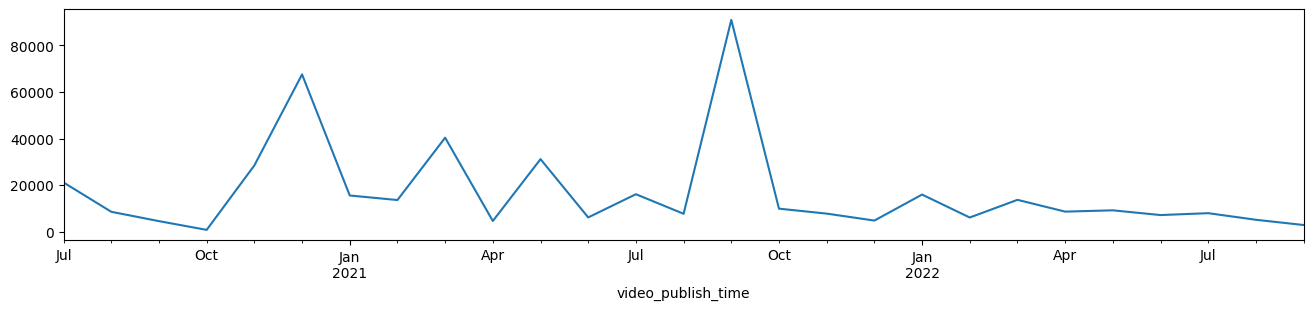

In [21]:
(df
 .set_index("video_publish_time")
 .sort_index()
 .views
 .resample("m")
 .mean()
 .fillna(0)
 .plot(figsize=(16,3))
)

In [22]:
def plot_timeseries(df, columns):
    df = df.set_index("video_publish_time").sort_index() # set the index with the value in the columns video_publish_time and sorted it 
    fig = px.line(
        df,
        x=df.index,
        y=columns,
        template="simple_white",
        hover_name="video_title",
        title=f"Development: {', '.join(columns).title()}",
    ) # create a fig using using plotly express with the following arguments(dataframe, axis x, axis y, template hover_name, and the title that will apper )
    fig.update_layout(hovermode="x unified", margin=dict(l=0, r=0, t=50, b=5)) #  hovermode="x unified" is when hovering over data points on the plot, the hover labels will be shown for all traces at the same x-coordinate. This is useful for comparing values across multiple traces.
    return fig

fig = plot_timeseries(df=df, columns=["views", "likes", "comments_added"])
fig.show()

c:\Users\HOME\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [23]:
def plot_column(df, column, top_values=10, color="#d33682"):
    df = df.nlargest(top_values, columns=column).sort_values(by=column)
    title = f"<b>{column.replace('_',' ').replace('pct','%').title()} - Top {top_values} videos</b>"
    mean = df[column].mean()
    median = df[column].median()

    fig = px.bar(
        df,
        x=column,
        y="video_title",
        orientation="h",
        title=title,
        color_discrete_sequence=[color] * top_values,
        template="plotly_white",
        text=column,
    )
    # add a vertical "mean" line
    fig.add_vline(
        x=mean,
        line_color="gray",
        line_width=3,
        opacity=1,
        line_dash="dot",
        annotation_position="top",
        annotation=dict(text="<i>mean</i>", font_size=12, font_color="gray"),
    )
    # add a vertical "mediam" line
    fig.add_vline(
        x=median,
        line_color="salmon",
        line_width=3,
        opacity=1,
        line_dash="dot",
        annotation_position="bottom",
        annotation=dict(text="<i>median</i>", font_size=12, font_color="salmon"),
    )
    fig.update_layout(
        plot_bgcolor="rgba(0,0,0,0)",
        yaxis=(dict(showgrid=False, title=None)),
        xaxis=(dict(showgrid=False, title=None, showticklabels=False)),
        margin=dict(l=0, r=0, t=50, b=5),
    )
    return fig

In [24]:
df.select_dtypes('number').columns.to_list()

['comments_added',
 'average_viewed_pct',
 'likes',
 'views',
 'impressions_ctr_pct',
 'days_since_published',
 'likes_per_day',
 'likes_to_view_ratio_pct',
 'comments_to_view_ratio_pct']

In [25]:
fig = plot_column(df=df, column="likes_to_view_ratio_pct", top_values=8)
fig.show()
# Optional: Export the chart to a standalone HTML file
fig.write_html("chart.html")

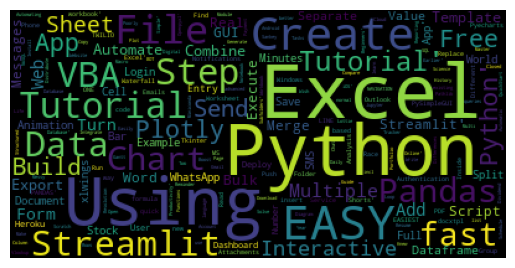

In [26]:
def generate_wordcloud(df, column, max_font_size=60, collocations=False):
    text = df[column].values
    return WordCloud(max_font_size=max_font_size, collocations=collocations).generate(str(text))   

wordcloud = generate_wordcloud(df, "video_title")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()